# Crypto Markets Data Analysis

Analyzing data of crypto markets data
- Data Cleaning
- Data Filtering
- Finding the insights of dataset
- Set Hypothesis based on the dataset
- Presenting the data as per the finding the answer of the hypothesis

In [67]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df_cr = pd.read_csv("crypto-markets.csv")

In [69]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   date         942297 non-null  object 
 4   ranknow      942297 non-null  int64  
 5   open         942297 non-null  float64
 6   high         942297 non-null  float64
 7   low          942297 non-null  float64
 8   close        942297 non-null  float64
 9   volume       942297 non-null  float64
 10  market       942297 non-null  float64
 11  close_ratio  942297 non-null  float64
 12  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


In [70]:
df_cr.describe().T

,count,mean,std,min,25%,50%,75%,max
ranknow,942297.0,1.000171e+03,5.875753e+02,1.000000e+00,465.000000,1072.000000,1.484000e+03,2.072000e+03
open,942297.0,3.483522e+02,1.318436e+04,2.500000e-09,0.002321,0.023983,2.268600e-01,2.298390e+06
high,942297.0,4.085930e+02,1.616386e+04,3.200000e-09,0.002628,0.026802,2.508940e-01,2.926100e+06
low,942297.0,2.962526e+02,1.092931e+04,2.500000e-10,0.002044,0.021437,2.043910e-01,2.030590e+06
close,942297.0,3.461018e+02,1.309822e+04,2.000000e-10,0.002314,0.023892,2.259340e-01,2.300740e+06
volume,942297.0,8.720383e+06,1.839802e+08,0.000000e+00,175.000000,4278.000000,1.190900e+05,2.384090e+10
market,942297.0,1.725060e+08,3.575590e+09,0.000000e+00,29581.000000,522796.000000,6.874647e+06,3.265025e+11
close_ratio,942297.0,4.594995e-01,3.261605e-01,-1.000000e+00,0.162900,0.432400,7.458000e-01,1.000000e+00
spread,942297.0,1.123400e+02,6.783713e+03,0.000000e+00,0.000000,0.000000,3.000000e-02,1.770563e+06


In [71]:
df_cr.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [72]:
df_cr.shape

(942297, 13)

In [73]:
df_cr.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [74]:
df_cr.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1622.0,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1823.0,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1913.0,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1788.0,0.4421,3124.52
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


## Original Data backup

In [75]:
df_cr_b1 = df_cr.copy 
"""Original data backup"""

'Original data backup'

## Data Cleaning

In [76]:
df_cr.isnull().sum() #No Null Data available in the dataframe

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

In [77]:
df_cr.dtypes

slug            object
symbol          object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object

In [78]:
#Replacing special charecter for string data
colums = ['slug', 'symbol', 'name']
for col in df_cr[colums]:
    df_cr[col] = df_cr[col].str.replace(r'\W', "")
print(df_cr)    

/tmp/ipykernel_4340/1301157957.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cr[col] = df_cr[col].str.replace(r'\W', "")


            slug symbol      name        date  ranknow      open      high  \
0        bitcoin    BTC   Bitcoin  2013-04-28        1    135.30    135.98   
1        bitcoin    BTC   Bitcoin  2013-04-29        1    134.44    147.49   
2        bitcoin    BTC   Bitcoin  2013-04-30        1    144.00    146.93   
3        bitcoin    BTC   Bitcoin  2013-05-01        1    139.00    139.89   
4        bitcoin    BTC   Bitcoin  2013-05-02        1    116.38    125.60   
...          ...    ...       ...         ...      ...       ...       ...   
942292  projectx  NANOX  ProjectX  2018-11-26     1727  22424.60  23049.30   
942293  projectx  NANOX  ProjectX  2018-11-27     1727  20711.90  23742.10   
942294  projectx  NANOX  ProjectX  2018-11-28     1727  23320.90  25235.10   
942295  projectx  NANOX  ProjectX  2018-11-29     1727  24543.53  24582.47   
942296  projectx  NANOX  ProjectX  2018-11-30     1727  22872.09  23086.98   

             low     close  volume        market  close_ratio  

In [79]:
print(df_cr['name'].str.replace(r'\W', ""))

/tmp/ipykernel_4340/839700863.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  print(df_cr['name'].str.replace(r'\W', ""))


0          Bitcoin
1          Bitcoin
2          Bitcoin
3          Bitcoin
4          Bitcoin
            ...   
942292    ProjectX
942293    ProjectX
942294    ProjectX
942295    ProjectX
942296    ProjectX
Name: name, Length: 942297, dtype: object


## Data Filtering

In [80]:
df_cr


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,projectx,NANOX,ProjectX,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,projectx,NANOX,ProjectX,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,projectx,NANOX,ProjectX,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,projectx,NANOX,ProjectX,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [81]:
#df_name = df_cr[['slug', 'name']]
#df_name_slug_incon = df_name[df_name['slug'].str.upper() != df_name['name'].str.upper()]
#print(df_name_slug_incon)
#df_sort_symbol_rank  = df_cr.sort_values(by=['name'], ascending=False)
#df_sort_symbol_rank
#df_cr_check = df_cr.name

#df_cr_check = df_cr.name
#df_cr_check.nunique()#2070

### Finding Crypto coin insight las per the rank

- Median
- Standard deviation

In [82]:
df_rank_name = df_cr.groupby(by = ['ranknow', 'name'])

In [83]:
df_rank_name_t10 = df_rank_name.median().head(10)
"""Top 10 crypto status in crypto market """

'Top 10 crypto status in crypto market '

In [84]:
df_rank_name_10 = df_rank_name.std().head(10)
"""Last 10 crypto status in crypto market"""

'Last 10 crypto status in crypto market'

#### Finding yearly breakdown of Crypto market

In [105]:
#yearly_breakdown = ['date','market', 'spread']
#df_date_year  = df_cr[yearly_breakdown]
#df_date_year['year'] = df_cr.date.str.slice(0,4).astype(int)

df_cr['date'] = pd.to_datetime(df_cr['date'])
df_cr['year'] = df_cr['date'].dt.year
df_cr['month'] = df_cr['date'].dt.month

yearly_breakdown = ['date','market', 'spread','year']
df_date_year  = df_cr[yearly_breakdown]


In [106]:
df_date_year

,date,market,spread,year
0,2013-04-28,1.488567e+09,3.88,2013
1,2013-04-29,1.603769e+09,13.49,2013
2,2013-04-30,1.542813e+09,12.88,2013
3,2013-05-01,1.298955e+09,32.17,2013
4,2013-05-02,1.168517e+09,33.32,2013
...,...,...,...,...
942292,2018-11-26,1.622000e+03,5441.80,2018
942293,2018-11-27,1.823000e+03,4449.20,2018
942294,2018-11-28,1.913000e+03,5347.00,2018
942295,2018-11-29,1.788000e+03,3124.52,2018


In [87]:
df_yearly_breakdown = df_date_year.groupby(by=['year'])

In [88]:
df_yearly_breakdown_max = df_yearly_breakdown.max()

In [89]:
df_yearly_breakdown_min = df_yearly_breakdown.min()
df_yearly_breakdown_min

,date,market,spread
year,,,
2013,2013-04-28,337.0,0.0
2014,2014-01-01,0.0,0.0
2015,2015-01-01,0.0,0.0
2016,2016-01-01,0.0,0.0
2017,2017-01-01,0.0,0.0
2018,2018-01-01,0.0,0.0


In [90]:
df_yearly_breakdown_med = df_yearly_breakdown.median()

#### Bitcoin analysis

In [91]:

df_year  = df_cr.copy()
df_year['year'] = df_cr.date.str.slice(0,4).astype(int)

In [92]:
df_bitcoin = df_year[df_year['symbol'] == 'BTC']
df_bitcoin = df_bitcoin.iloc[:,5:]

In [93]:
df_btc_yearly_breakdown = df_bitcoin.groupby(by=['year'])
df_btc_yearly_breakdown.max()

,open,high,low,close,volume,market,close_ratio,spread
year,,,,,,,,
2013,1152.73,1156.14,1106.61,1151.17,4.686270e+07,1.390343e+10,1.0,349.72
2014,946.49,1017.12,905.71,953.29,1.263140e+08,1.162053e+10,1.0,163.74
2015,465.21,495.56,456.77,465.32,2.639000e+08,6.963785e+09,1.0,115.01
2016,975.13,979.40,954.50,975.92,3.633210e+08,1.568277e+10,1.0,96.81
2017,19475.80,20089.00,18974.10,19497.40,2.219800e+10,3.265025e+11,1.0,4110.40
2018,17527.30,17712.40,16764.60,17527.00,2.384090e+10,2.942174e+11,1.0,3648.20


In [94]:
df_btc_yearly_breakdown.min()

,open,high,low,close,volume,market,close_ratio,spread
year,,,,,,,,
2013,68.50,74.56,65.53,68.43,0.000000e+00,7.784112e+08,0.0,0.00
2014,310.91,314.81,289.30,310.74,2.857830e+06,4.241891e+09,0.0,3.02
2015,176.90,211.73,171.51,178.10,7.860650e+06,2.444379e+09,0.0,1.03
2016,365.07,374.95,354.91,364.33,2.851400e+07,5.496598e+09,0.0,1.46
2017,775.18,823.31,755.76,777.76,6.085170e+07,1.251914e+10,0.0,3.58
2018,3765.95,3862.96,3585.06,3779.13,2.923670e+09,6.573929e+10,0.0,32.28


In [95]:
df_btc_yearly_breakdown_med = df_btc_yearly_breakdown.median()
df_btc_yearly_breakdown_med
#df_btc_yearly_breakdown.median()

,open,high,low,close,volume,market,close_ratio,spread
year,,,,,,,,
2013,127.11,129.995,124.705,127.075,0.000000e+00,1.475489e+09,0.59635,7.375
2014,502.90,516.160,489.730,502.500,1.889870e+07,6.564529e+09,0.45050,17.750
2015,248.72,254.690,244.130,249.010,2.478250e+07,3.557986e+09,0.57440,7.590
2016,582.07,588.960,575.315,582.555,7.076340e+07,9.201876e+09,0.60775,8.360
2017,2577.77,2682.260,2510.480,2589.410,1.182870e+09,4.247073e+10,0.63160,155.110
2018,7263.00,7419.050,6984.070,7193.250,5.014430e+09,1.240446e+11,0.50780,318.160


In [96]:
df_btc_yearly_breakdown_std = df_btc_yearly_breakdown.std()

### Data Insights

- This dataset contains 6 years crypto data from 2013 to 2018
- Total 2070 unique rows
- total rows:942297 and total column:13 
    - here we have created one new column named 'year' 
-All special charecter removed.

This dataset about 6 year crypto data market, thats represnts every crypto's business area and market value. Its provides the openning , closing, highest, lowest along with the market value for every days.

## Hypothesis: The crypto market spread its area and volume in world economy as time goes on.
In our anlysis we will try to find the status as per the data, wheather its increases the volume or not. As well as we would like to find the market status of top 10 ranked crypto coins. Finally we would like to compare among top 10 and last 10 crypto coin to undertand the diferences.

## Data visualisation as per the finding the hypothesis answer

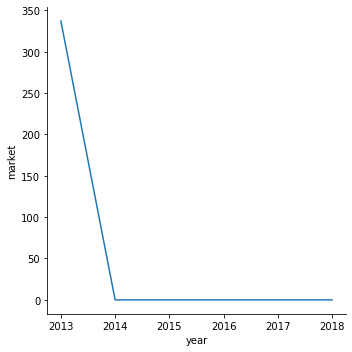

In [97]:
#df_yearly_breakdown.hist()
sns.relplot(data=df_yearly_breakdown_min, x='year', y='market', kind='line')

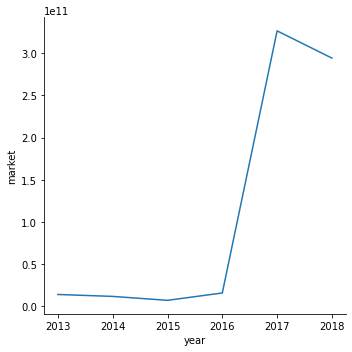

In [98]:
sns.relplot(data = df_yearly_breakdown_max, x= 'year', y= 'market', kind = 'line')

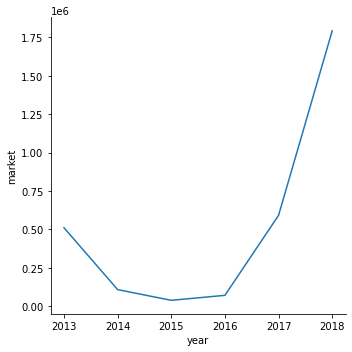

In [99]:
sns.relplot(data = df_yearly_breakdown_med, x= 'year', y= 'market', kind = 'line')

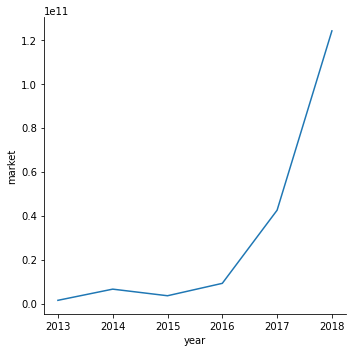

In [100]:
sns.relplot(data = df_btc_yearly_breakdown_med, x= 'year', y ='market', kind= 'line')

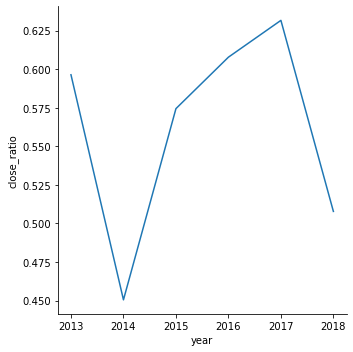

In [101]:
sns.relplot(data = df_btc_yearly_breakdown_med, x= 'year', y ='close_ratio', kind= 'line')